# LIBRARIES

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img
import random
import pathlib 
%matplotlib inline

In [2]:
path = '/kaggle/input/alzheimer-mri-dataset/Dataset'
data_dir = pathlib.Path(path)

# DATA LOAD

In [3]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/kaggle/input/alzheimer-mri-dataset/Dataset', output="output", seed=1345, ratio=(.8, 0.1,0.1)) 

Copying files: 6400 files [00:28, 221.33 files/s]


In [4]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 5119 files belonging to 4 classes.
Found 642 files belonging to 4 classes.
Found 639 files belonging to 4 classes.


In [5]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>

# EXAMPLE IMAGE

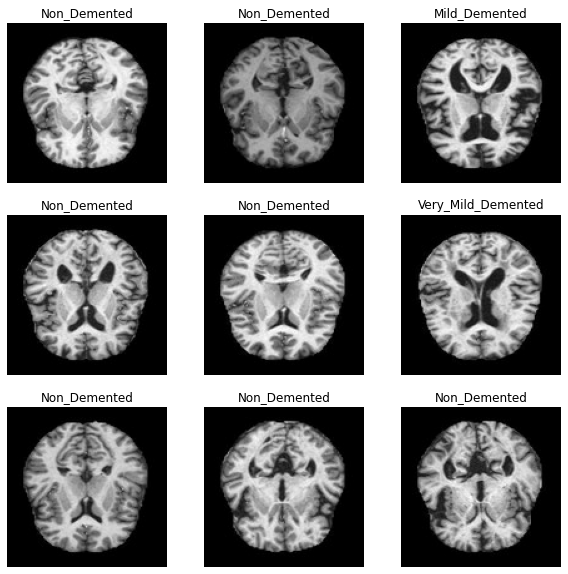

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<function matplotlib.pyplot.show(close=None, block=None)>

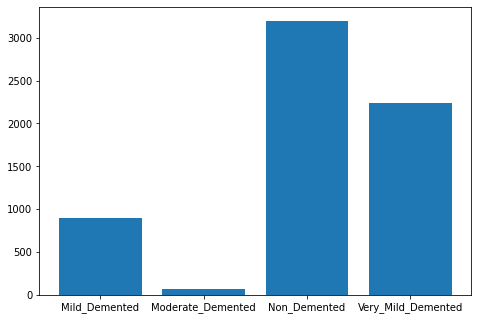

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = [896,64,3200,2240]
ax.bar(class_names,size)
plt.show

# MODEL

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1

In [11]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=10, batch_size=64, verbose=1)

Epoch 1/10
80/80 [==============================] - 10s 28ms/step - loss: 1.0893 - accuracy: 0.4776 - val_loss: 0.9687 - val_accuracy: 0.5430
Epoch 2/10
80/80 [==============================] - 2s 24ms/step - loss: 0.9068 - accuracy: 0.5704 - val_loss: 0.8547 - val_accuracy: 0.6416
Epoch 3/10
80/80 [==============================] - 2s 23ms/step - loss: 0.8063 - accuracy: 0.6359 - val_loss: 0.7282 - val_accuracy: 0.6651
Epoch 4/10
80/80 [==============================] - 2s 22ms/step - loss: 0.7126 - accuracy: 0.6870 - val_loss: 0.6531 - val_accuracy: 0.7340
Epoch 5/10
80/80 [==============================] - 2s 23ms/step - loss: 0.6024 - accuracy: 0.7472 - val_loss: 0.4950 - val_accuracy: 0.8357
Epoch 6/10
80/80 [==============================] - 2s 22ms/step - loss: 0.4970 - accuracy: 0.7957 - val_loss: 0.4101 - val_accuracy: 0.8498
Epoch 7/10
80/80 [==============================] - 2s 21ms/step - loss: 0.3646 - accuracy: 0.8549 - val_loss: 0.2864 - val_accuracy: 0.8967
Epoch 8/10
8

# Plot the result


In [12]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

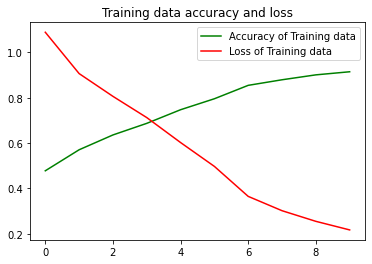

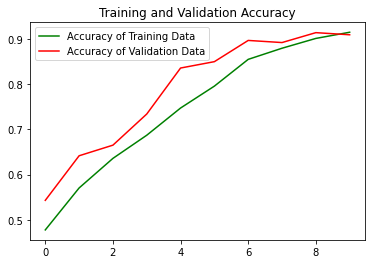

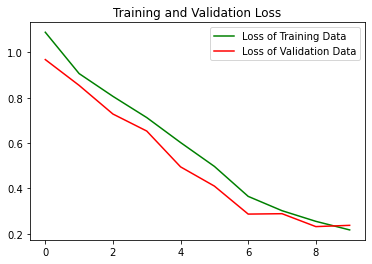

<Figure size 432x288 with 0 Axes>

In [13]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

# Predictions

In [14]:
def plot(path,class_name):
    print(path)
    plt.figure(figsize=(8,8))
    
    img = plt.imread(path)
    
    plt.xticks([])
    plt.yticks([])
    plt.title("Class Name: "+class_name)
    plt.imshow(img)

/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_901.jpg


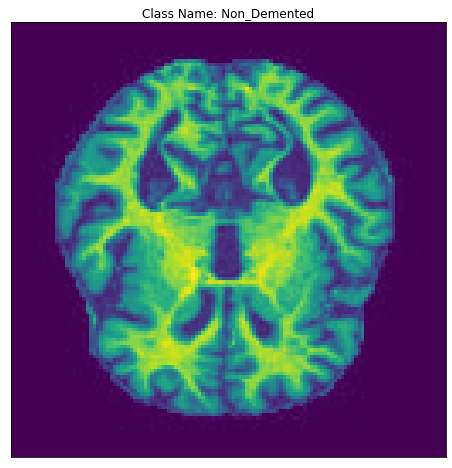

In [15]:
Non_Demented = random.choice(list(data_dir.glob("Non_Demented/*.jpg")))

plot(str(Non_Demented),"Non_Demented")

/kaggle/input/alzheimer-mri-dataset/Dataset/Very_Mild_Demented/verymild_1502.jpg


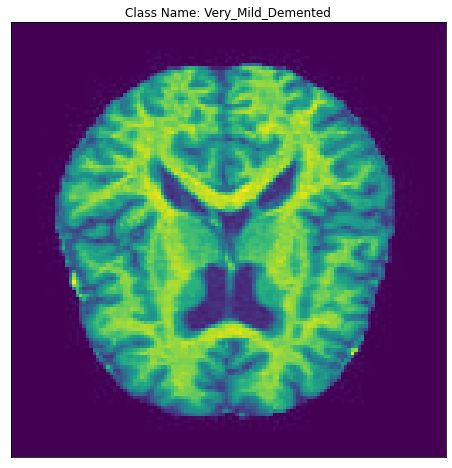

In [16]:
Very_Mild_Demented = random.choice(list(data_dir.glob("Very_Mild_Demented/*.jpg")))

plot(str(Very_Mild_Demented),"Very_Mild_Demented")

/kaggle/input/alzheimer-mri-dataset/Dataset/Mild_Demented/mild_887.jpg


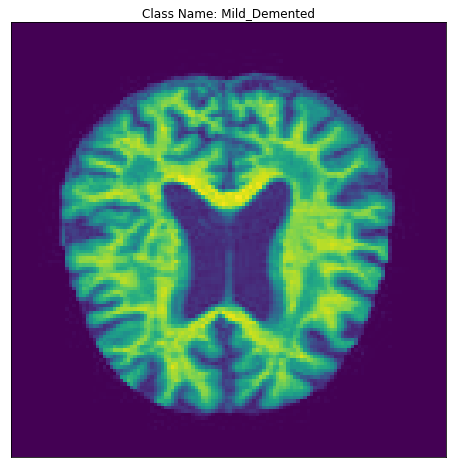

In [17]:
Mild_Demented = random.choice(list(data_dir.glob("Mild_Demented/*.jpg")))

plot(str(Mild_Demented),"Mild_Demented")

/kaggle/input/alzheimer-mri-dataset/Dataset/Moderate_Demented/moderate_20.jpg


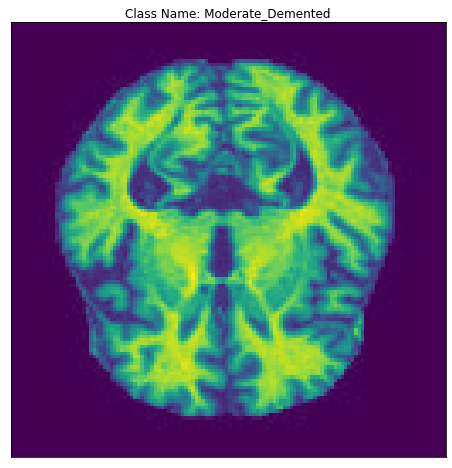

In [18]:
Moderate_Demented = random.choice(list(data_dir.glob("Moderate_Demented/*.jpg")))

plot(str(Moderate_Demented),"Moderate_Demented")

In [19]:
loss, accuracy = model.evaluate(test_ds)

11/11 [==============================] - 0s 12ms/step - loss: 0.2430 - accuracy: 0.9159


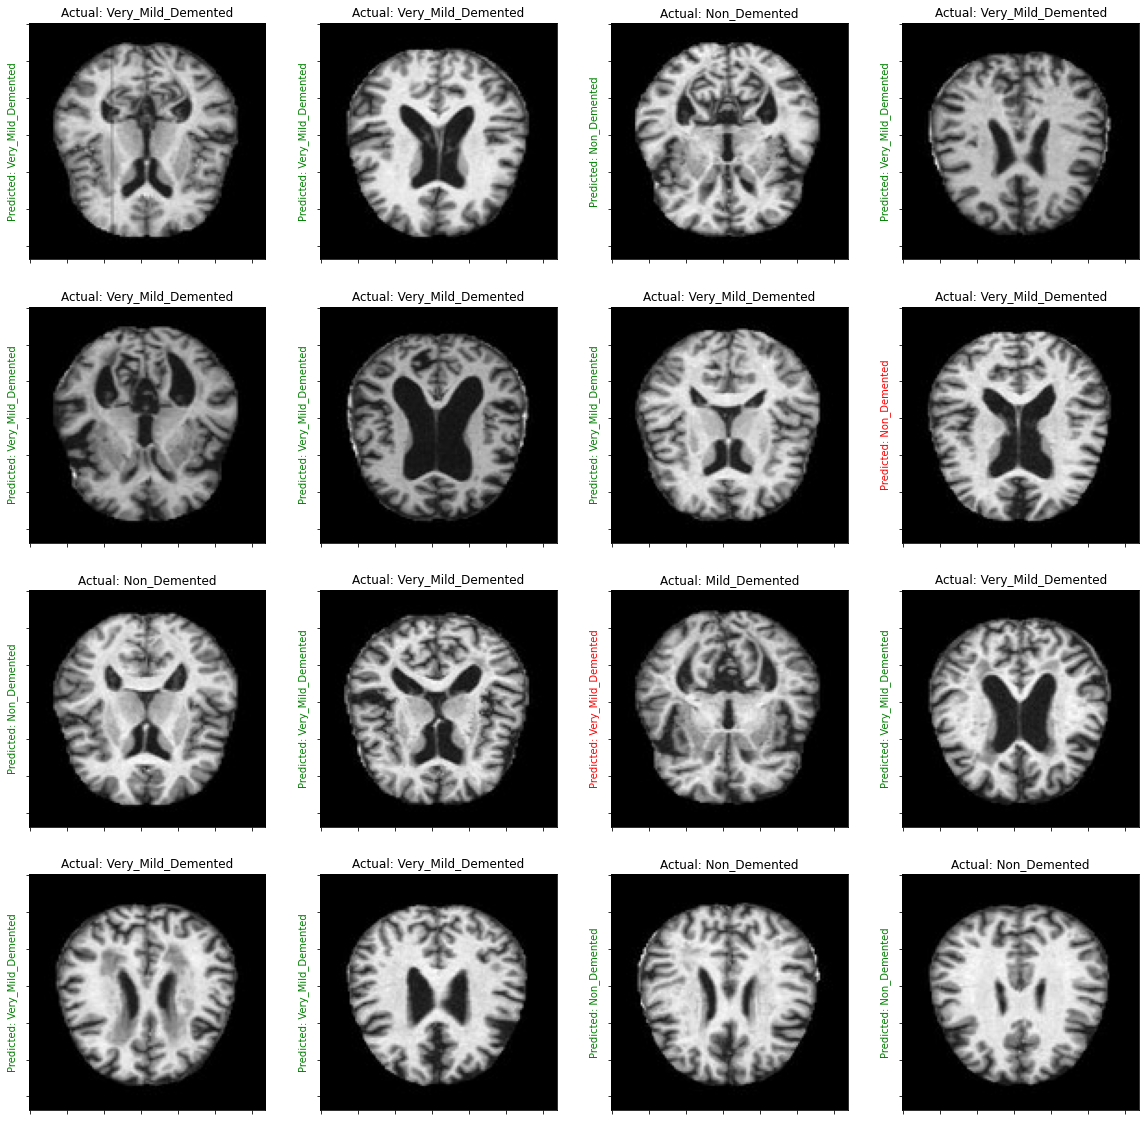

In [20]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])